# 4.10 Task: Part 1

## 1. Import Data

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Set Path
path = r'/Users/kareemahashiru/Desktop/Data Analytics Course/Instacart Basket Analysis (October 2024)'

In [8]:
# Import latest dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cu_merge.pkl'))

In [10]:
# Display all columns
pd.set_option('display.max_columns', None)

In [12]:
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,7.0,True,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,True,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,True,12427,3,0,both,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,True,26088,4,0,both,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,True,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. Security Implication to address any PII data

**The columns**: first_name, last_name, age, state, and income alone don't pose a security risk. However, combined could cuase for a security concern

In [14]:
# To address this issue, I'll drop down the "last name" column. I'll also drop the "merge" column because it is irrelevant to this project.
df = df.drop(columns = ['last_name', '_merge'])

In [16]:
# View new columns
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423


In [43]:
df['order_frequency_flag'].value_counts()

order_frequency_flag
Frequent customer        22808749
Regular customer          6935476
Non-frequent customer     2689987
Name: count, dtype: int64

## 3. Segment data by region

In [18]:
# Define a function to assign regions
result = []
for value in df['state']:
    if value in ('Maine'	'New Hampshire'	'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	'Pennsylvania'	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	'Minnesota'	'Iowa'	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii'
) :
        result.append('West')
    else :
        result.append('Not a region')

In [20]:
# Assign the values in result[] to new column region
df['region'] = result

In [22]:
df['region'].value_counts()

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [24]:
# View new column
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South


## 3a. Compare spending habits in different regions by creating a crosstab

In [50]:
crosstab = pd.crosstab (df['region'], df['spending_flag'], dropna = False)

In [51]:
crosstab.to_clipboard()

In [52]:
# Print the crosstab
print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest              156129      7447681
Northeast            108343      5620004
South                210182     10591428
West                 160807      8139638


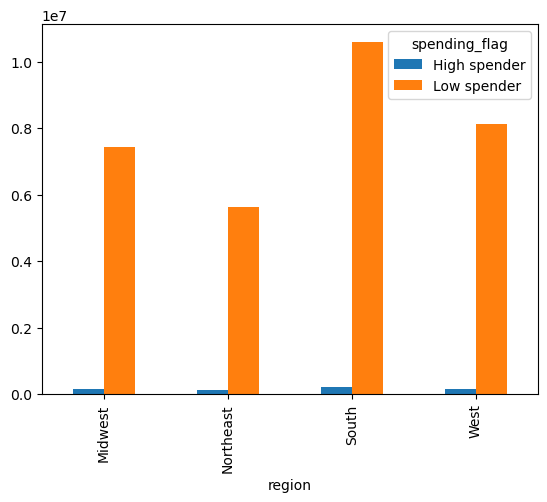

In [53]:
# Visualize spending category with a Bar graph
bar_spend = crosstab.plot.bar()

The southern region has the highest number of high and  low spenders. This may be due to the number of states, their population and lower cost of living.

## 4. Exclude low-activity customers

In [32]:
# Create a new column to flag low-activity customers
# Exclude customers where max_order is less than 5
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [34]:
# Keep customers where max_order is greater than or equal to 5
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [36]:
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,dependents_flag,exclusion_flag
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep


In [38]:
df['exclusion_flag'].value_counts()

exclusion_flag
Keep       30992664
Exclude     1441548
Name: count, dtype: int64

In [85]:
exclusion_flag_crosstab = pd.crosstab(df['max_order'], df['exclusion_flag'],dropna = False)

In [86]:
exclusion_flag_crosstab.to_clipboard()

Confirmed in excel that an exclusion flag 'Exclude' is added when max_order is less than 5

In [88]:
# Create a subset (excludng rows that have max order less than 5)
df = df[df['exclusion_flag'] == 'Keep']

In [89]:
df.shape

(30992664, 34)

Confirmed above that the number of rows and the count of 'Keep' exclusion flag are the same

In [40]:
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,dependents_flag,exclusion_flag
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep


In [92]:
# Export Filtered Data
df.to_csv(os.path.join(path,'02 Data','Prepared Data', 'low_activity_excluded.csv'))

## 5. Profiling variables

### 5a. Age

In [42]:
# Create age profiling variable
df.loc[df['age'] <= 25 ,'age_group'] = 'Young Adult'
df.loc[(df['age'] > 25) & (df['age'] <= 40) ,'age_group'] = 'Adult'
df.loc[(df['age'] > 40) & (df['age'] <= 65) ,'age_group'] = 'Older Adult'
df.loc[df['age'] > 65 ,'age_group'] = 'Senior'

In [44]:
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,dependents_flag,exclusion_flag,age_group
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult


In [46]:
df['age_group'].value_counts()

age_group
Older Adult    12658478
Senior          8095218
Adult           7631507
Young Adult     4049009
Name: count, dtype: int64

In [48]:
# Aggregate for age group usage frequency
df.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                    10.855700  0.0  30.0
Older Adult              10.849816  0.0  30.0
Senior                   10.819670  0.0  30.0
Young Adult              10.830015  0.0  30.0

In [99]:
# To adjust for the price error/outlier of 99999, I decided to update the data frame to only show prices that are < or = 15
df = df[df['prices'] <= 15]

In [100]:
# Aggregate for age group usage frequency
df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.628032  1.0  15.0
Older Adult  7.633458  1.0  15.0
Senior       7.631468  1.0  15.0
Young Adult  7.624926  1.0  15.0

### 5b. Income

In [50]:
# Create income profiling variable
df.loc[df['income'] <= 50000 ,'income_group'] = 'Low'
df.loc[(df['income'] > 50000) & (df['age'] <= 100000) ,'income_group'] = 'Middle'
df.loc[df['income'] > 100000 ,'income_group'] = 'High'

In [103]:
df['income_group'].value_counts()

income_group
High      14016750
Middle    13229473
Low        3348484
Name: count, dtype: int64

In [52]:
# Check for new column
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,dependents_flag,exclusion_flag,age_group,income_group
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low


### 5c. Certain goods in the "department_id" column

In [54]:
# Import Department dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [56]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [58]:
df_final_merge = df.merge(dept, on='department_id', indicator='created')

In [60]:
df_final_merge.head(5)

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,dependents_flag,exclusion_flag,age_group,income_group,department,created
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low,beverages,both
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low,dairy eggs,both
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low,snacks,both
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low,snacks,both
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low,household,both


In [ ]:
# Exporting new dataframe with department merged 
df_final_merge.to_csv(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.csv'))

### 5d. Number of Dependents

In [62]:
df.loc[df['number_of_dependents'] > 0 ,'dependents_flag'] = 'Has Dependents'
df.loc[df['number_of_dependents'] == 0 ,'dependents_flag'] = 'No Dependents'

In [28]:
df['dependents_flag'].value_counts()

dependents_flag
Has Dependents    24329015
No Dependents      8105197
Name: count, dtype: int64

In [64]:
# Check for new column
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,dependents_flag,exclusion_flag,age_group,income_group
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low


## 6. Visualize Profiling Variables

### 6a. Age

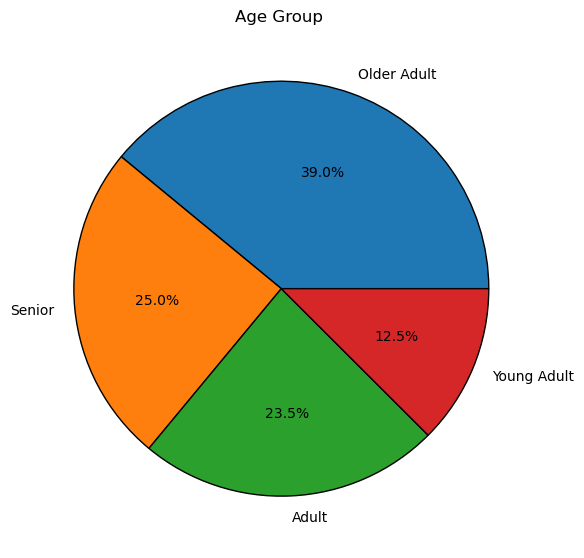

In [66]:
# Pie Chart
pie_age_group_counts = df['age_group'].value_counts()
plt.figure(figsize=(6,6))
age_group_pie_chart=pie_age_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Age Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# Export Pie Chart
age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_group_pie_chart.png'))

### 6b. Income

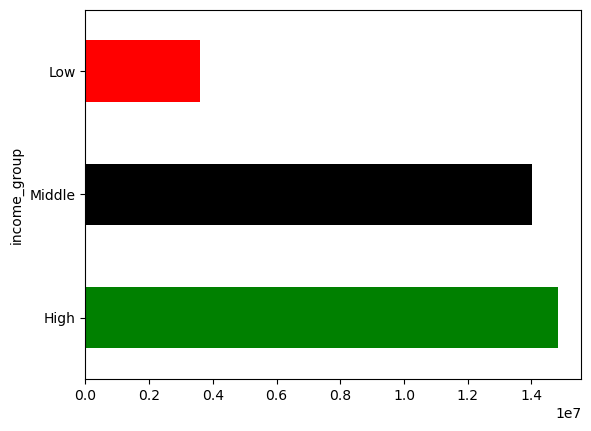

In [68]:
# Bar Chart
bar_income_group = df['income_group'].value_counts().plot.barh(color = ['green','black','red'])

In [ ]:
# Export Bar Chart
bar_income_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_income_group.png'))

### 6c. Certain Goods

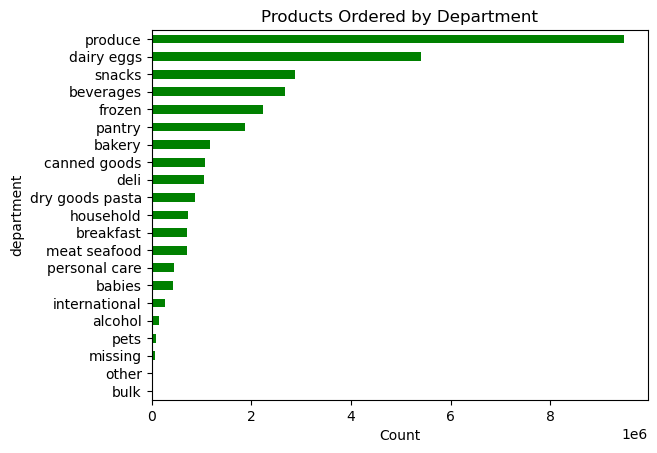

In [70]:
# Bar chart frequency of orders vs department
depts_bar = df_final_merge['department'].value_counts(ascending=True).plot(kind='barh', color='green', xlabel = 'Count', title='Products Ordered by Department') 

In [ ]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

### 6d. Dependents

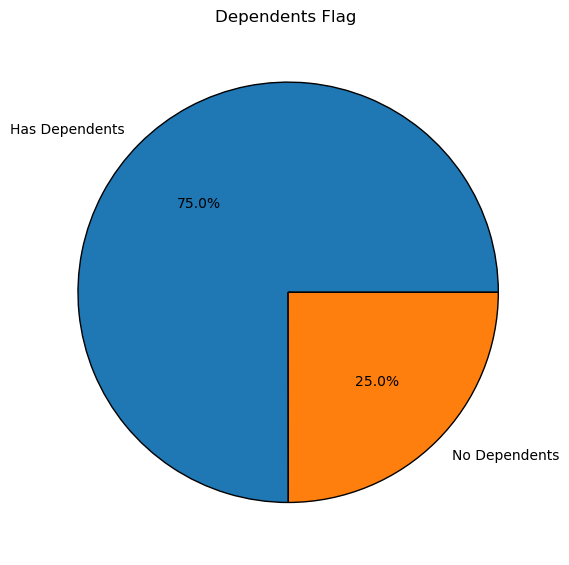

In [72]:
# Pie Chart
pie_age_group_counts = df['dependents_flag'].value_counts()
plt.figure(figsize=(6,6))
dependents_flag_pie_chart=pie_age_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Dependents Flag ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# Export Pie Chart
dependents_flag_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'dependents_flag_pie_chart.png'))

In [74]:
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,dependents_flag,exclusion_flag,age_group,income_group
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low


In [76]:
df = df.rename(columns = {
    'order_frequency_flag': 'customer_frequency'})

In [78]:
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,customer_frequency,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,dependents_flag,exclusion_flag,age_group,income_group
0,2539329,1,1,2,8,7.0,True,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
1,2539329,1,1,2,8,7.0,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
2,2539329,1,1,2,8,7.0,True,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
3,2539329,1,1,2,8,7.0,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low
4,2539329,1,1,2,8,7.0,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,South,Has Dependents,Keep,Adult,Low


## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [80]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df.groupby(['user_id', 'gender', 'state', 'region', 'number_of_dependents', 'family_status', 'age_group', 'order_number', 'orders_days_of_week', 'order_hour_of_day', 'spending_flag', 'customer_frequency', 'dependents_flag', 'income_group'])['prices'].sum().reset_index()

In [82]:
customer_profile.head()

,user_id,gender,state,region,number_of_dependents,family_status,age_group,order_number,orders_days_of_week,order_hour_of_day,spending_flag,customer_frequency,dependents_flag,income_group,prices
0,1,Female,Alabama,South,3,married,Adult,1,2,8,Low spender,Regular customer,Has Dependents,Low,31.6
1,1,Female,Alabama,South,3,married,Adult,2,3,7,Low spender,Regular customer,Has Dependents,Low,35.4
2,1,Female,Alabama,South,3,married,Adult,3,3,12,Low spender,Regular customer,Has Dependents,Low,28.2
3,1,Female,Alabama,South,3,married,Adult,4,4,7,Low spender,Regular customer,Has Dependents,Low,26.0
4,1,Female,Alabama,South,3,married,Adult,5,4,15,Low spender,Regular customer,Has Dependents,Low,57.0


In [84]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [86]:
customer_agg

order_number           prices                  
                 max min  mean    max   min        mean
user_id                                                
1                 10   1   5.5   63.1  25.0   37.570000
2                 14   1   7.5  213.1  19.0  104.685714
3                 12   1   6.5  107.2  30.7   60.116667
4                  5   1   3.0   63.4  10.8   29.540000
5                  4   1   2.5  118.4  43.6   85.000000
...              ...  ..   ...    ...   ...         ...
206205             3   1   2.0  149.1  51.6   95.033333
206206            67   1  34.0  157.3   9.6   32.526866
206207            16   1   8.5  200.8  42.8  101.931250
206208            49   1  25.0  238.5  38.7  115.595918
206209            13   1   7.0  131.5  11.1   70.046154

[206209 rows x 6 columns]

In [88]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = df.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [90]:
freq_agg

order_number                days_since_prior_order                
                 max min       mean                    max  min       mean
user_id                                                                   
1                 10   1   5.813559                   30.0  0.0  19.135593
2                 14   1   8.035897                   30.0  3.0  15.369231
3                 12   1   6.000000                   21.0  7.0  10.977273
4                  5   1   2.888889                   21.0  0.0  13.500000
5                  4   1   2.486486                   19.0  7.0  12.270270
...              ...  ..        ...                    ...  ...        ...
206205             3   1   1.687500                   30.0  7.0  13.406250
206206            67   1  38.007018                   15.0  0.0   4.084211
206207            16   1   8.116592                   30.0  1.0  14.031390
206208            49   1  25.505170                   20.0  0.0   7.434269
206209            13   1   6.937984                   30.0  3.0  18.937984

[206209 rows x 6 columns]

## 8. Compare customer profiles with regions and departments

## Region vs Department

In [92]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df_final_merge['region'], df_final_merge['department'], dropna = False)
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,36195,98983,274777,625585,165269,8193,250702,1267696,245678,203769,524404,175824,63736,166130,16535,8420,442134,105772,22356,2227937,673715
Northeast,26559,75139,209468,483422,125068,5802,186755,956809,186817,151816,391311,131485,46891,124621,12374,6585,329479,78831,18601,1665839,514675
South,51633,143654,390294,898957,236753,11533,356015,1801966,349419,287444,748463,243070,89142,235754,23193,12212,622529,150410,31272,3160551,957346
West,39356,106026,302248,680195,183557,9045,274586,1387545,269335,223598,572254,188287,69484,182426,17043,9074,481435,112678,25495,2424964,741814


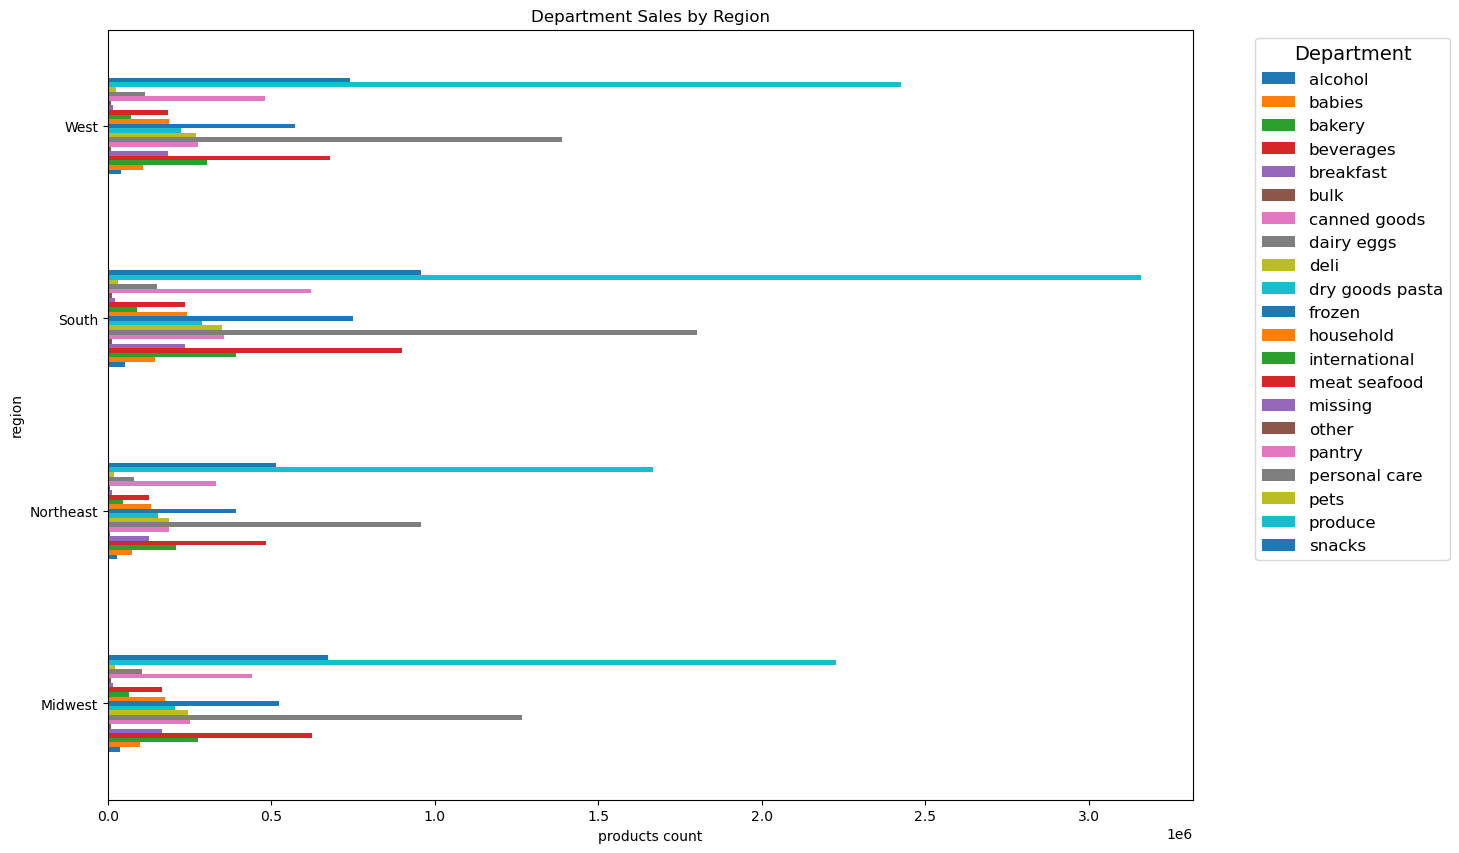

In [94]:
# bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [ ]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_depts_bar.png'))

In [96]:
# import orders_products_customers
df_cu = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cu_merge.pkl'))

In [98]:
df_cu.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,7.0,True,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,True,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,True,12427,3,0,both,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,True,26088,4,0,both,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,True,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Text(0.5, 0, '')

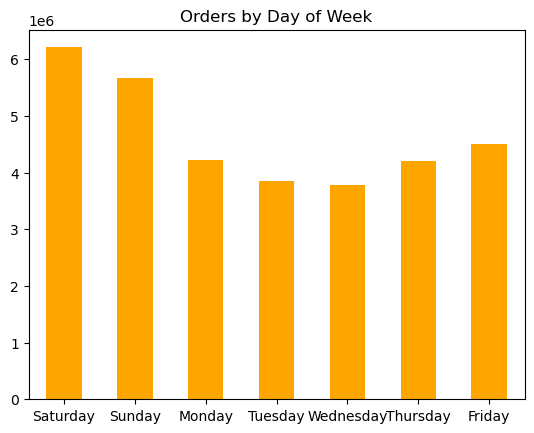

In [100]:
# Bar chart orders by day of week
orders_dow_bar = df['orders_days_of_week'].value_counts().sort_index().plot.bar(color = 'orange')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [ ]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

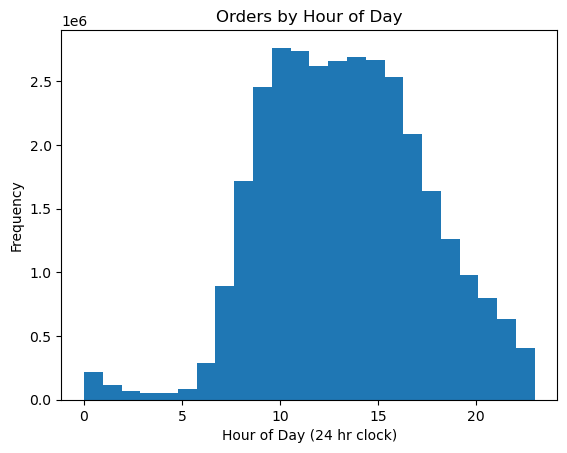

In [102]:
# Histogram of hours of the day
hod_hist=df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [ ]:
# Export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_hist.png'))

In [104]:
# Crosstab loyalty with income group
loyalty_income_cross = pd.crosstab(df['loyalty_flag'], df['income_group'], dropna = False)
loyalty_income_cross

income_group,High,Low,Middle
loyalty_flag,,,
Loyal customer,4762067,1034190,4497480
New customer,2753113,859545,2636740
Regular customer,7311592,1704136,6875349


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

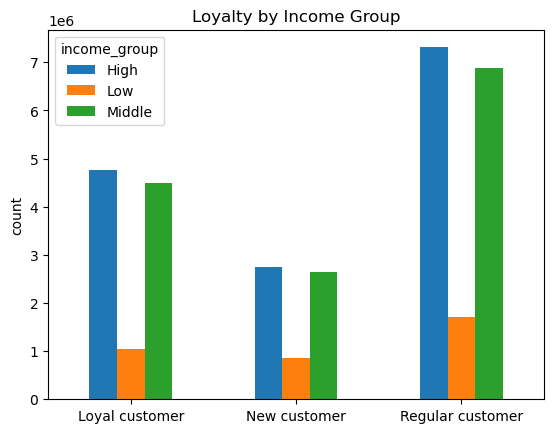

In [106]:
# Bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [ ]:
# Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [108]:
# Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)
loyalty_spender_cross

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,217155,10076582
New customer,115199,6134199
Regular customer,303107,15587970


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

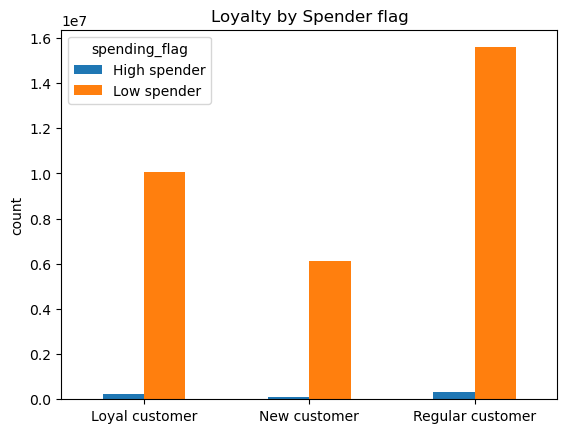

In [110]:
# Bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [ ]:
# Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spender_bar.png'))

In [112]:
# Crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(df['loyalty_flag'], df['family_status'], dropna = False)
loyalty_fam_cross

family_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,883487,493265,7208852,1708133
New customer,530816,291459,4397438,1029685
Regular customer,1360125,767378,11170623,2592951


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

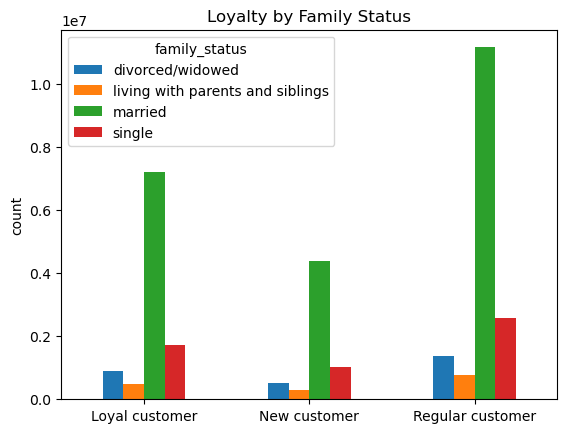

In [114]:
# bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [ ]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_fam_bar.png'))

In [116]:
# Crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(df['loyalty_flag'], df['dependents_flag'], dropna = False)
loyalty_depend_cross

dependents_flag,Has Dependents,No Dependents
loyalty_flag,,
Loyal customer,7702117,2591620
New customer,4688897,1560501
Regular customer,11938001,3953076


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

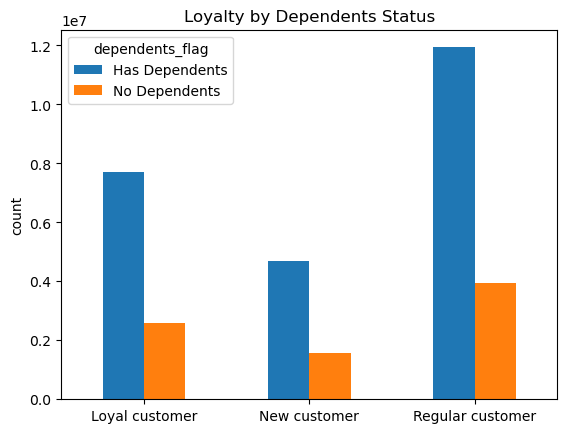

In [118]:
# bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependents Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [120]:
# Check value counts for family status
fam_status = df['family_status'].value_counts(dropna = False)
fam_status

family_status
married                             22776913
single                               5330769
divorced/widowed                     2774428
living with parents and siblings     1552102
Name: count, dtype: int64

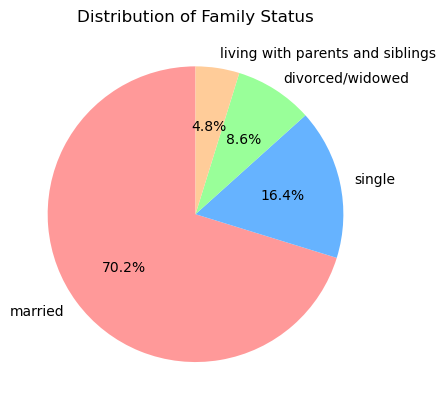

In [122]:
# Pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [ ]:
# Export the chart
fam_status_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_bar.png'))

## 9. Produce suitable charts to illustrate your results and export them in your project folder.

#### See graphs/charts above

In [ ]:
df_final_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart_final.pkl'))